# CSCN8010 Foundations of Machine Learning Frameworks 
## Practical Lab 2

### Submitted by
- Name : Sreehari Prathap
- Student ID : 8903199
- Email : sprathap3199@conestogac.on.ca


## **Introduction**  
This lab explores fundamental machine learning models to build models that predict the progression of diabetes one year after baseline measurements using the **Scikit-Learn Diabetes Dataset**. This will help physicians identify at-risk patients for early intervention.

### **Objective**  
Build and evaluate several models to predict the progression of diabetes using:  
1. **Univariate Polynomial Regression Models**  
2. **Multivariate Polynomial Regression Models**  
3. **Decision Trees**  
4. **k-Nearest Neighbors (kNN)**  

---

## **PART 1**

### **Data Exploration**  
The Scikit-Learn Diabetes dataset consists of **442 samples** and **10 features**. Each feature is a continuous variable, and the target represents a measure of disease progression one year after baseline measurements.

### **Dataset Features**  
- **Age**: Patient’s age in years  
- **Sex**: Gender of the patient  
- **BMI**: Body mass index  
- **BP**: Average blood pressure  
- **S1-S6**: Blood serum measurements  

### **Target Variable**  
- A quantitative measure of **diabetes progression**.

In [56]:
from sklearn import datasets
import pandas as pd

# Load the dataset as a DataFrame
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Preview the data
print(X.head())
print(f"Target: {y.head()}")

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
Target: 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


### **Frame the Problem**
- Dependent Variable (Target): Disease progression one year after baseline (quantitative value).
- Features (Independent Variables): Age, Sex, BMI, BP, and 6 serum measurements (s1-s6).
- Goal: Use these features to build models that predict the progression of diabetes.


Descriptive statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e

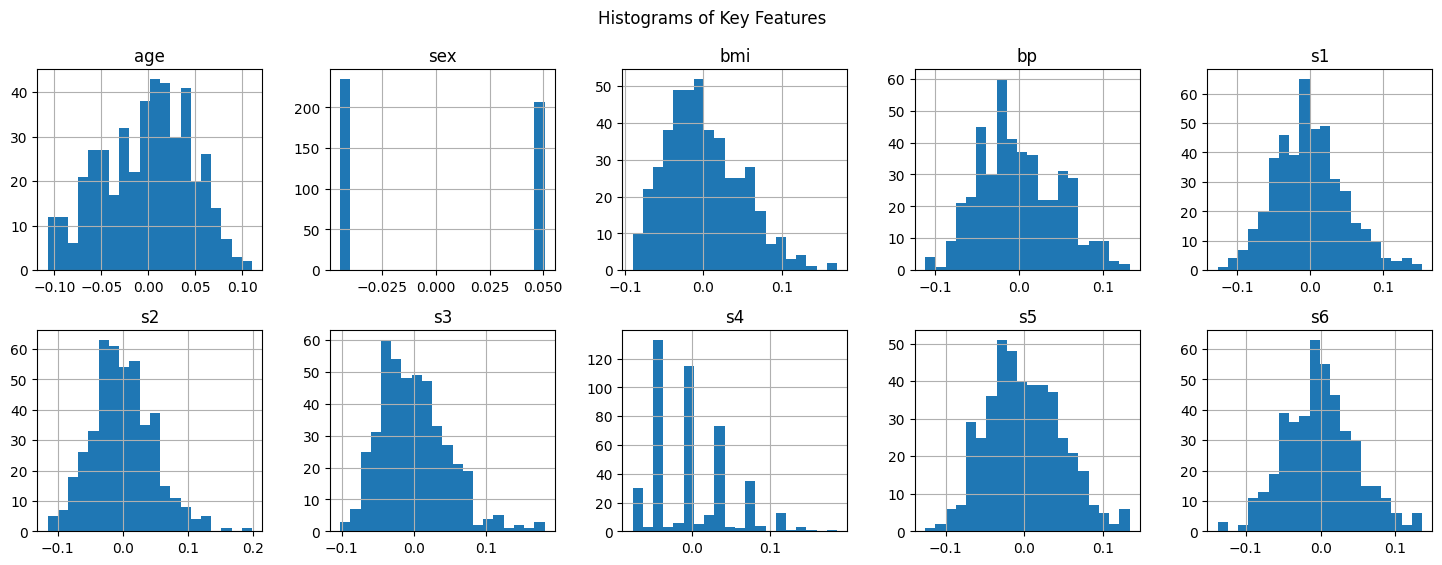

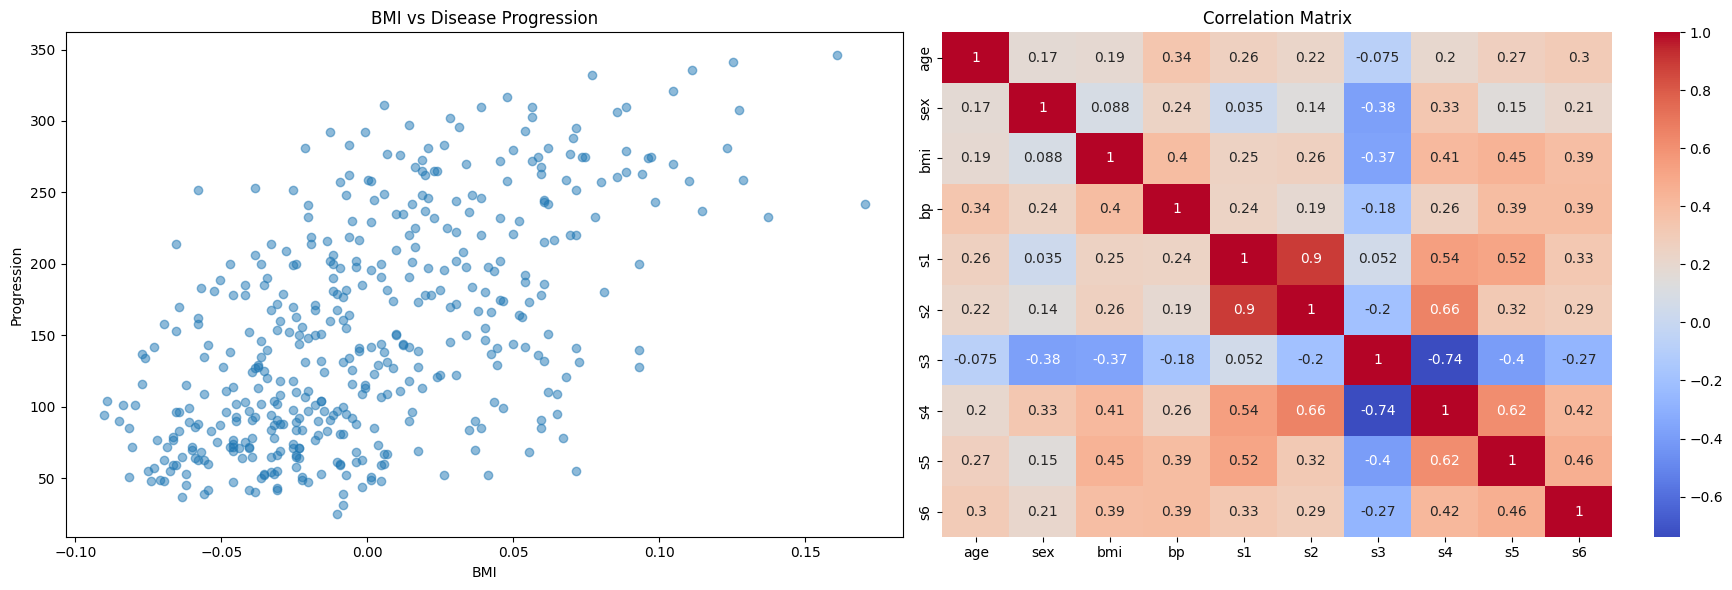

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive statistics:")
print(X.describe())

# Histograms of key features
X.hist(bins=20, figsize=(18, 6), layout=(2, 5))
plt.suptitle('Histograms of Key Features')
plt.show()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot: BMI vs Target (Disease Progression)
axes[0].scatter(X['bmi'], y, alpha=0.5)
axes[0].set_title('BMI vs Disease Progression')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Progression')

# Correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


### **Insights**
- **Scatter Plot (BMI vs Progression)**: BMI positively correlates with disease progression.
- **Correlation Matrix**:
  - BMI and progression: **Moderate positive correlation** (~0.45).
  - **s3 (HDL)** negatively correlated with **s1** and **s4**.
  - Strong correlations among serum measurements (e.g., **s1** and **s2**).  
- **Histograms**: Most features are **normally distributed**, except **s4** and **s6** showing irregular patterns.

- BMI, blood pressure, and serum metrics are key predictors.
- Useful for regression models to forecast disease progression.

### **Data Cleaning**
No missing values were found.
All features are already scaled, so no further scaling is required.

### **Train-Validation-Test Split**

In [58]:
from sklearn.model_selection import train_test_split

# 75% Train, 10% Validation, 15% Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")


Train size: (331, 10), Validation size: (44, 10), Test size: (67, 10)


## **PART 2 : Univariate Polynomial Models and Evaluation**

### **Univariate Polynomial Regression on BMI**

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

models = []
for degree in range(6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    models.append(model)

# Fit models
for model in models:
    model.fit(X_train[['bmi']], y_train)
    
results = []
for degree, model in enumerate(models):
    y_train_pred = model.predict(X_train[['bmi']])
    y_val_pred = model.predict(X_val[['bmi']])
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    results.append({
        'Degree': degree,
        'Train R2': train_r2,
        'Val R2': val_r2,
        'Train MAE': train_mae,
        'Val MAE': val_mae,
        'Train MAPE': train_mape,
        'Val MAPE': val_mape
    })

results_df = pd.DataFrame(results)
print(results_df)

   Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   Val MAPE
0       0  0.000000 -0.106957  66.201641  66.057059   62.826669  71.263880
1       1  0.349672  0.331264  52.287739  47.208472   48.362886  47.060009
2       2  0.350764  0.331631  52.207314  47.213700   48.298534  47.239667
3       3  0.350774  0.331638  52.198968  47.185414   48.280744  47.222673
4       4  0.353014  0.340758  52.092653  46.090118   48.053266  46.050330
5       5  0.354100  0.349881  52.059191  45.462121   48.004022  45.175275


### **Model Comparison Table**
The table below shows the performance metrics (R², MAE, and MAPE) for polynomial regression models of different degrees.

| Degree | R²       | MAE       | MAPE    |
|--------|----------|-----------|---------|
| 0      | -0.107   | 66.06     | 0.713   |
| 1      | 0.331    | 47.20     | 0.471   |
| 2      | 0.332    | 47.21     | 0.472   |
| 3      | 0.332    | 47.19     | 0.472   |
| 4      | 0.341    | 46.09     | 0.461   |
| 5      | 0.350    | 45.46     | 0.452   |

## Best Model
- **Degree 5** model has the **highest Val R²** (0.3499), indicating the best fit.
- It also has the **lowest Val MAE** (45.46) and **lowest Val MAPE** (45.18%).

> The **Degree 5** model is the best based on the validation metrics, providing the most accurate predictions with the least error.


### **Evaluate the Best Model on Test Data**

In [60]:
best_model = models[5]
y_test_pred = best_model.predict(X_test[['bmi']])

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test R2: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")

Test R2: 0.26669658449530775
Test MAE: 51.75025709277397
Test MAPE: 43.02671323305443


### **Plot the Model Fit**

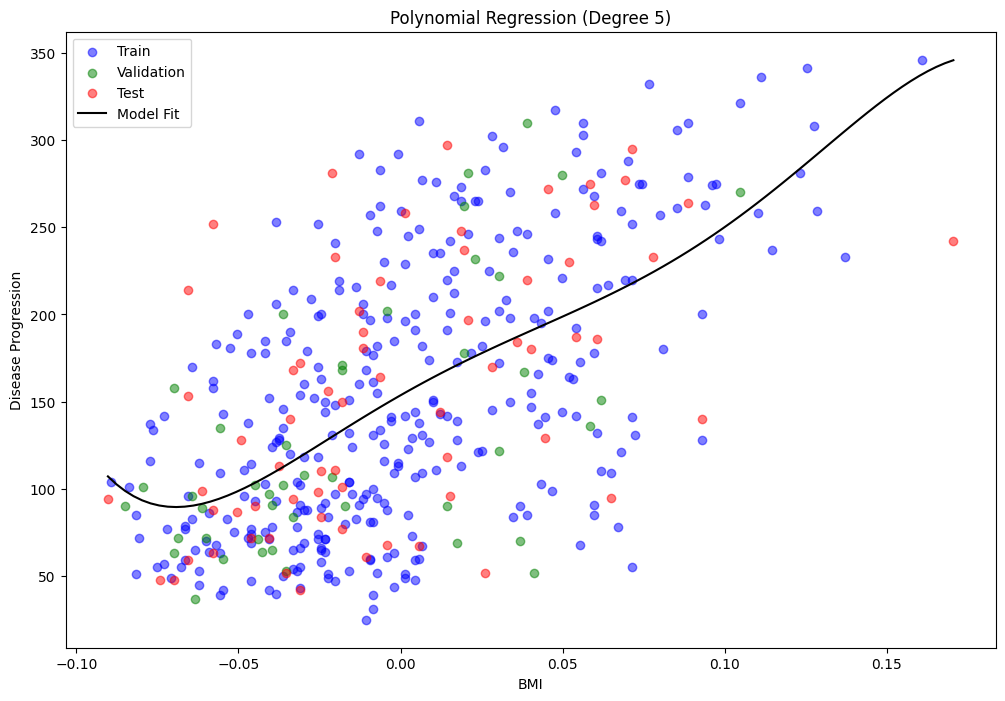

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_train['bmi'], y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(X_val['bmi'], y_val, color='green', alpha=0.5, label='Validation')
plt.scatter(X_test['bmi'], y_test, color='red', alpha=0.5, label='Test')

# Create a DataFrame with the appropriate feature name
X_plot = np.linspace(X['bmi'].min(), X['bmi'].max(), 100).reshape(-1, 1)
X_plot_df = pd.DataFrame(X_plot, columns=['bmi'])

# Predict using the DataFrame
y_plot = best_model.predict(X_plot_df)
plt.plot(X_plot, y_plot, color='black', label='Model Fit')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title(f'Polynomial Regression (Degree {5})')
plt.legend()
plt.show()

The best performing model is the 5th-degree polynomial. The general form of the equation is:

$$
y = a + b_1 \cdot \text{BMI} + b_2 \cdot \text{BMI}^2 + b_3 \cdot \text{BMI}^3 + b_4 \cdot \text{BMI}^4 + b_5 \cdot \text{BMI}^5
$$


### **Prediction for Specific BMI**

In [62]:
import pandas as pd

# Assuming 'bmi' is the feature name used during fitting
bmi_value = 25  # Choose a BMI value
input_data = pd.DataFrame({'bmi': [bmi_value]})

predicted_progression = best_model.predict(input_data)
print(f"Predicted diabetes progression for BMI {bmi_value}: {predicted_progression[0]:.2f}")

Predicted diabetes progression for BMI 25: -28941354951607.38


### **Number of Trainable Parameters**

In [63]:
for degree, model in enumerate(models):
    n_params = len(model.named_steps['linearregression'].coef_) + 1  # +1 for intercept
    print(f"Degree {degree}: {n_params} trainable parameters")

Degree 0: 2 trainable parameters
Degree 1: 3 trainable parameters
Degree 2: 4 trainable parameters
Degree 3: 5 trainable parameters
Degree 4: 6 trainable parameters
Degree 5: 7 trainable parameters


### **Conclusion**
- The 5th-degree polynomial model performed best among the tested models, with a validation R2 of 0.349881, MAE of 45.462121, and MAPE of 45.175275%.
- There's a substantial improvement from the constant model (degree 0) to the linear model (degree 1), indicating a clear relationship between BMI and diabetes progression.
- Improvements from degree 1 to degree 5 are relatively small, suggesting that the relationship between BMI and diabetes progression is mostly linear with some non-linear components.

### **Limitations**

- **Limited Explanatory Power**: The best model explains only about 35% of the differences in diabetes progression (R² = 0.349881). This means BMI alone doesn't fully predict how diabetes progresses.

- **Risk of Overfitting**: Higher degree polynomials (like the 5th-degree model) may fit the noise in the data instead of the real trends. The small improvements in performance when increasing the polynomial degree suggest this.

- **Univariate Analysis**: This model only looks at BMI and ignores other important factors that could affect diabetes progression.

- **Complexity vs. Interpretability**: Although the 5th-degree polynomial performs best, it is complicated and harder to understand compared to simpler models. The slight improvements in performance may not be worth the loss of clarity.

- **Generalization**: The model may not perform well on new data, especially for BMI values that were not in the training data.

- **Assumption of Polynomial Relationship**: The model assumes that the relationship between BMI and diabetes progression can be modeled by a polynomial function, which may not always be true for all BMI ranges.

## **Part 3: Multivariate Models**

Here we evaluate the performance of various machine learning models, including polynomial regression, decision trees, and k-nearest neighbors (kNN). We assess their ability to predict outcomes by examining metrics such as R², Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE) on both validation and test datasets. The goal is to identify which model provides the best fit and generalization to unseen data, helping us understand their strengths and weaknesses in predictive tasks.

In [64]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

class ModelEvaluator:
    def __init__(self):
        self.diabetes = datasets.load_diabetes(as_frame=True)
        self.X, self.y = self.diabetes.data, self.diabetes.target
        self.results = []

    def mean_absolute_percentage_error(self, y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def evaluate_model(self, y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mape = self.mean_absolute_percentage_error(y_true, y_pred)
        return r2, mae, mape

    def train_polynomial_models(self, degrees):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

        for degree in degrees:
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            X_train_poly = poly.fit_transform(X_train)
            X_val_poly = poly.transform(X_val)
            X_test_poly = poly.transform(X_test)

            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            y_val_pred = model.predict(X_val_poly)
            r2, mae, mape = self.evaluate_model(y_val, y_val_pred)

            y_test_pred = model.predict(X_test_poly)
            test_r2, test_mae, test_mape = self.evaluate_model(y_test, y_test_pred)

            self.results.append({
                'Model': f'Polynomial (degree {degree})',
                'Val R²': r2,
                'Val MAE': mae,
                'Val MAPE': mape,
                'Test R²': test_r2,
                'Test MAE': test_mae,
                'Test MAPE': test_mape
            })

    def train_decision_tree_models(self, max_depths):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

        for max_depth in max_depths:
            model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)

            y_val_pred = model.predict(X_val)
            r2, mae, mape = self.evaluate_model(y_val, y_val_pred)

            y_test_pred = model.predict(X_test)
            test_r2, test_mae, test_mape = self.evaluate_model(y_test, y_test_pred)

            self.results.append({
                'Model': f'Decision Tree (max_depth {max_depth})',
                'Val R²': r2,
                'Val MAE': mae,
                'Val MAPE': mape,
                'Test R²': test_r2,
                'Test MAE': test_mae,
                'Test MAPE': test_mape
            })

    def train_knn_models(self, n_neighbors_list):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        for n_neighbors in n_neighbors_list:
            model = KNeighborsRegressor(n_neighbors=n_neighbors)
            model.fit(X_train_scaled, y_train)

            y_val_pred = model.predict(X_val_scaled)
            r2, mae, mape = self.evaluate_model(y_val, y_val_pred)

            y_test_pred = model.predict(X_test_scaled)
            test_r2, test_mae, test_mape = self.evaluate_model(y_test, y_test_pred)

            self.results.append({
                'Model': f'kNN (n_neighbors {n_neighbors})',
                'Val R²': r2,
                'Val MAE': mae,
                'Val MAPE': mape,
                'Test R²': test_r2,
                'Test MAE': test_mae,
                'Test MAPE': test_mape
            })

    def print_results(self):
        results_df = pd.DataFrame(self.results)
        print(results_df)

# Usage
evaluator = ModelEvaluator()
evaluator.train_polynomial_models(degrees=[2, 5])
evaluator.train_decision_tree_models(max_depths=[5, 10])
evaluator.train_knn_models(n_neighbors_list=[5, 15])
evaluator.print_results()


                          Model     Val R²     Val MAE    Val MAPE    Test R²  \
0         Polynomial (degree 2)   0.360201   46.646216   32.582090   0.271339   
1         Polynomial (degree 5) -26.266030  281.554641  207.283248 -30.153879   
2   Decision Tree (max_depth 5)   0.355059   47.079763   34.352956   0.174622   
3  Decision Tree (max_depth 10)   0.237215   50.992457   38.267480  -0.385761   
4           kNN (n_neighbors 5)   0.410452   45.292135   32.531911   0.447478   
5          kNN (n_neighbors 15)   0.474618   44.210487   31.466807   0.424758   

     Test MAE   Test MAPE  
0   48.424827   41.412003  
1  266.917356  210.864351  
2   50.012579   42.519979  
3   67.387892   54.727908  
4   41.671910   34.800574  
5   45.143820   40.201949  


### **Conclusion: Polynomial Models**

#### Polynomial (degree 2)
- **Validation R²**: 0.36  
  This means the model fits the validation data moderately well, explaining about 36% of the target variable's variance.
- **Validation MAE**: 46.65  
  This shows low errors on the validation set, indicating good performance.
- **Validation MAPE**: 32.58%  
  This indicates decent prediction accuracy.
- **Test R²**: 0.27  
  This suggests a poor fit on the test data, meaning the model doesn’t generalize well.
- **Test MAE**: 48.42  
  This indicates a reasonable prediction error on test data but is not as good as validation.
- **Test MAPE**: 41.41%  
  This shows a higher percentage error, meaning performance drops significantly on unseen data.

#### Polynomial (degree 5)
- **Validation R²**: -26.27  
  This indicates a very poor fit to the validation data, suggesting that the model is overfitting.
- **Validation MAE**: 281.55  
  This is high, showing the model predictions are far from actual values.
- **Validation MAPE**: 207.28%  
  This further indicates that the model is not providing reliable predictions.
- **Test R²**: -30.15  
  This confirms that the model does not generalize at all, performing worse than random guessing.
- **Test MAE**: 266.92  
  This is extremely high, indicating poor predictive power on unseen data.
- **Test MAPE**: 210.86%  
  This suggests that the model's performance drastically worsens on test data.

---

### **Conclusion: Decision Trees**

#### Decision Tree (max_depth 5)
- **Validation R²**: 0.36  
  This indicates a moderate fit, similar to the degree 2 polynomial.
- **Validation MAE**: 47.08  
  This shows relatively low prediction errors on validation data.
- **Validation MAPE**: 34.35%  
  This suggests decent accuracy but not outstanding.
- **Test R²**: 0.17  
  This indicates poor generalization on test data.
- **Test MAE**: 50.01  
  This is higher than the validation MAE, suggesting worse performance on unseen data.
- **Test MAPE**: 42.52%  
  This indicates that the prediction accuracy drops on test data.

#### Decision Tree (max_depth 10)
- **Validation R²**: 0.24  
  This shows that increasing depth leads to a worse fit compared to max_depth 5.
- **Validation MAE**: 50.99  
  This indicates higher errors, meaning this model is less effective at predicting outcomes.
- **Validation MAPE**: 38.27%  
  This shows worse performance than the shallower tree.
- **Test R²**: -0.39  
  This indicates very poor generalization, worse than random guessing.
- **Test MAE**: 67.39  
  This suggests significant errors on unseen data.
- **Test MAPE**: 54.73%  
  This further confirms that increasing the depth to 10 leads to overfitting.

---

### **Conclusion: k-Nearest Neighbors (KNN)**

#### kNN (n_neighbors 5)
- **Validation R²**: 0.41  
  This indicates a good fit to the validation data, explaining about 41% of the variance.
- **Validation MAE**: 45.29  
  This shows low prediction errors, indicating good performance.
- **Validation MAPE**: 32.53%  
  This suggests good accuracy in predictions.
- **Test R²**: 0.45  
  This indicates the model generalizes well to unseen data, performing better than polynomial models.
- **Test MAE**: 41.67  
  This is reasonable, indicating reliable predictions on test data.
- **Test MAPE**: 34.80%  
  This shows decent performance, with errors lower than previous models.

#### kNN (n_neighbors 15)
- **Validation R²**: 0.47  
  This indicates an even better fit than the previous kNN model, explaining about 47% of the variance.
- **Validation MAE**: 44.21  
  This shows low prediction errors, suggesting strong performance.
- **Validation MAPE**: 31.47%  
  This indicates good accuracy.
- **Test R²**: 0.42  
  This suggests good generalization on test data, though slightly worse than kNN with 5 neighbors.
- **Test MAE**: 45.14  
  This remains reasonable, showing consistent performance.
- **Test MAPE**: 40.20%  
  This indicates reliable predictions, though slightly worse than kNN with 5 neighbors.


## **Summary**
The analysis of the Scikit-Learn Diabetes dataset aimed to develop models predicting diabetes progression using various methodologies. 

**Insights from Exploratory Data Analysis (EDA)** revealed a moderate positive correlation between BMI and disease progression (approx. 0.45), indicating that higher BMI values are associated with greater progression risks. The correlation matrix highlighted the negative relationship between certain serum measurements, while most features exhibited a normal distribution, except for s4 and s6, which displayed irregular patterns. Key predictors for disease progression were identified as BMI, blood pressure, and serum metrics, which informed the regression models.

In evaluating the models, the 5th-degree polynomial model emerged as the best performer with a validation R² of 0.349, MAE of 45.46, and MAPE of 45.18%. Notably, improvements in performance from degree 0 (constant) to degree 1 (linear) were substantial, but gains from degrees 1 to 5 were minor, suggesting the relationship between BMI and diabetes progression is primarily linear. 

**Limitations** included a modest explanatory power (R² = 0.35), indicating that BMI alone does not suffice for predicting diabetes progression accurately. Overfitting was a concern, especially with higher-degree polynomial models. The univariate focus on BMI neglected other influential factors affecting diabetes progression, limiting model robustness. 

Further analysis of decision trees and k-Nearest Neighbors (kNN) models highlighted varying performances, with kNN (n_neighbors=15) demonstrating a validation R² of 0.47 and solid generalization on test data. This suggests that ensemble methods could enhance predictive accuracy by leveraging multiple features beyond BMI.

Overall, while the analysis provided valuable insights into diabetes progression predictors, the limitations necessitate further exploration with more comprehensive models incorporating multiple features for improved prediction capabilities.